# 4. Evaluation et analyse

## Analysons le changement des différents paramètres

Les courbes de perte varient très peu d'une architecture à l'autre. Nous allons donc nous baser sur le modèle SimpleRNN pour effectuer les comparaisons.

### Nombre d'unités (Units)

Nous avons testé différentes valeurs pour le nombre d’unités (32, 64, 128). Voici les résultats obtenus.

#### Prédictions

##### 32 Units

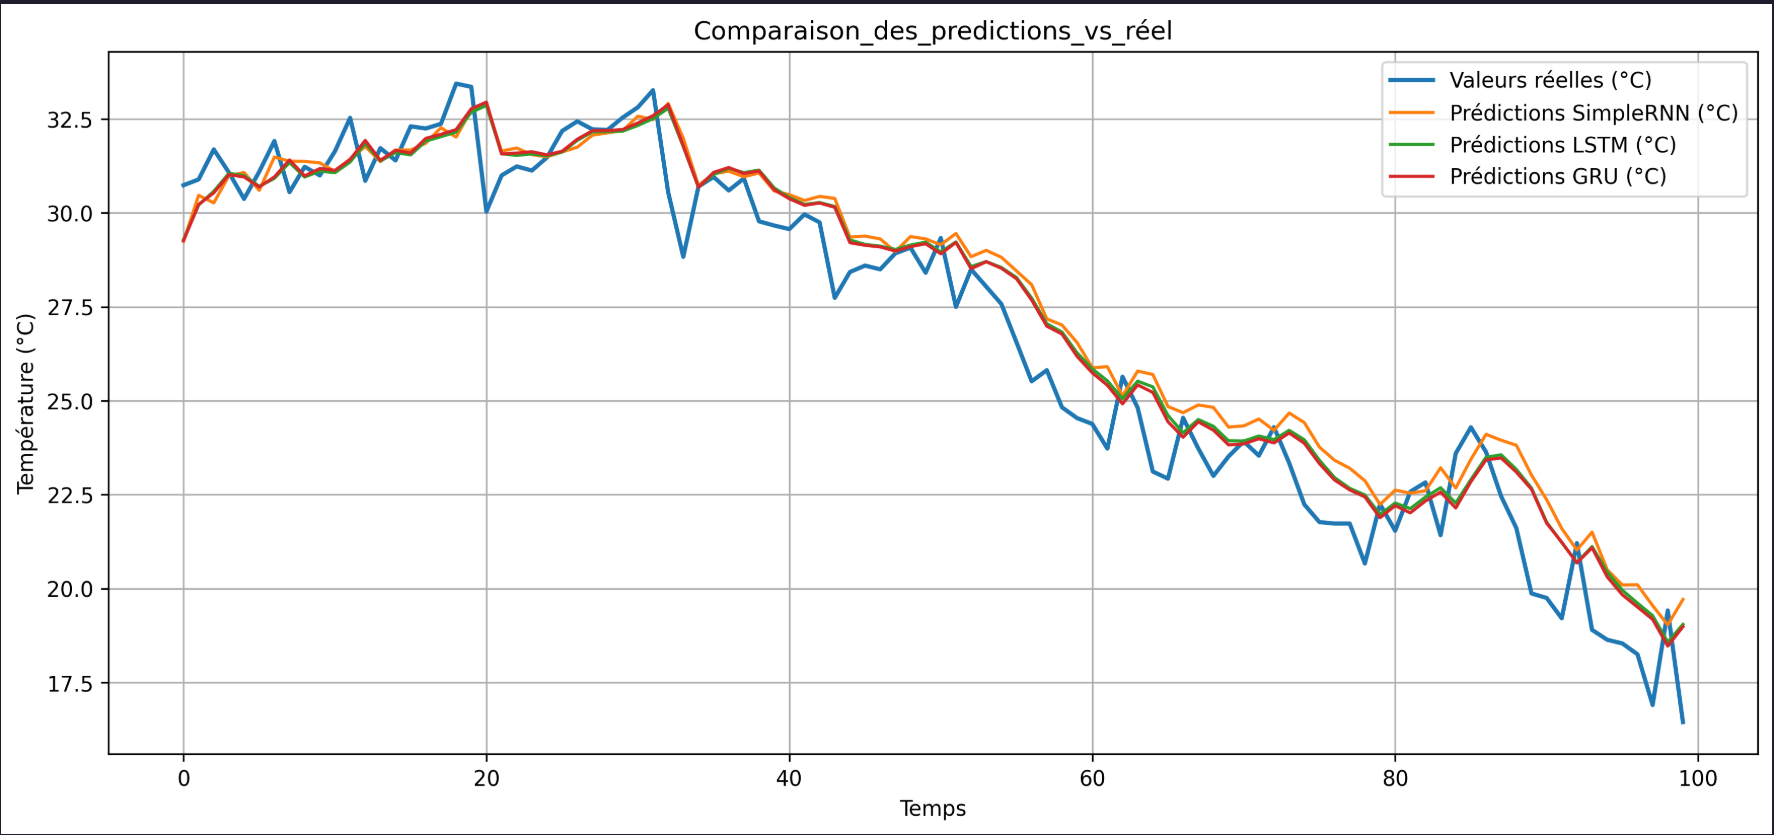

##### 64 Units

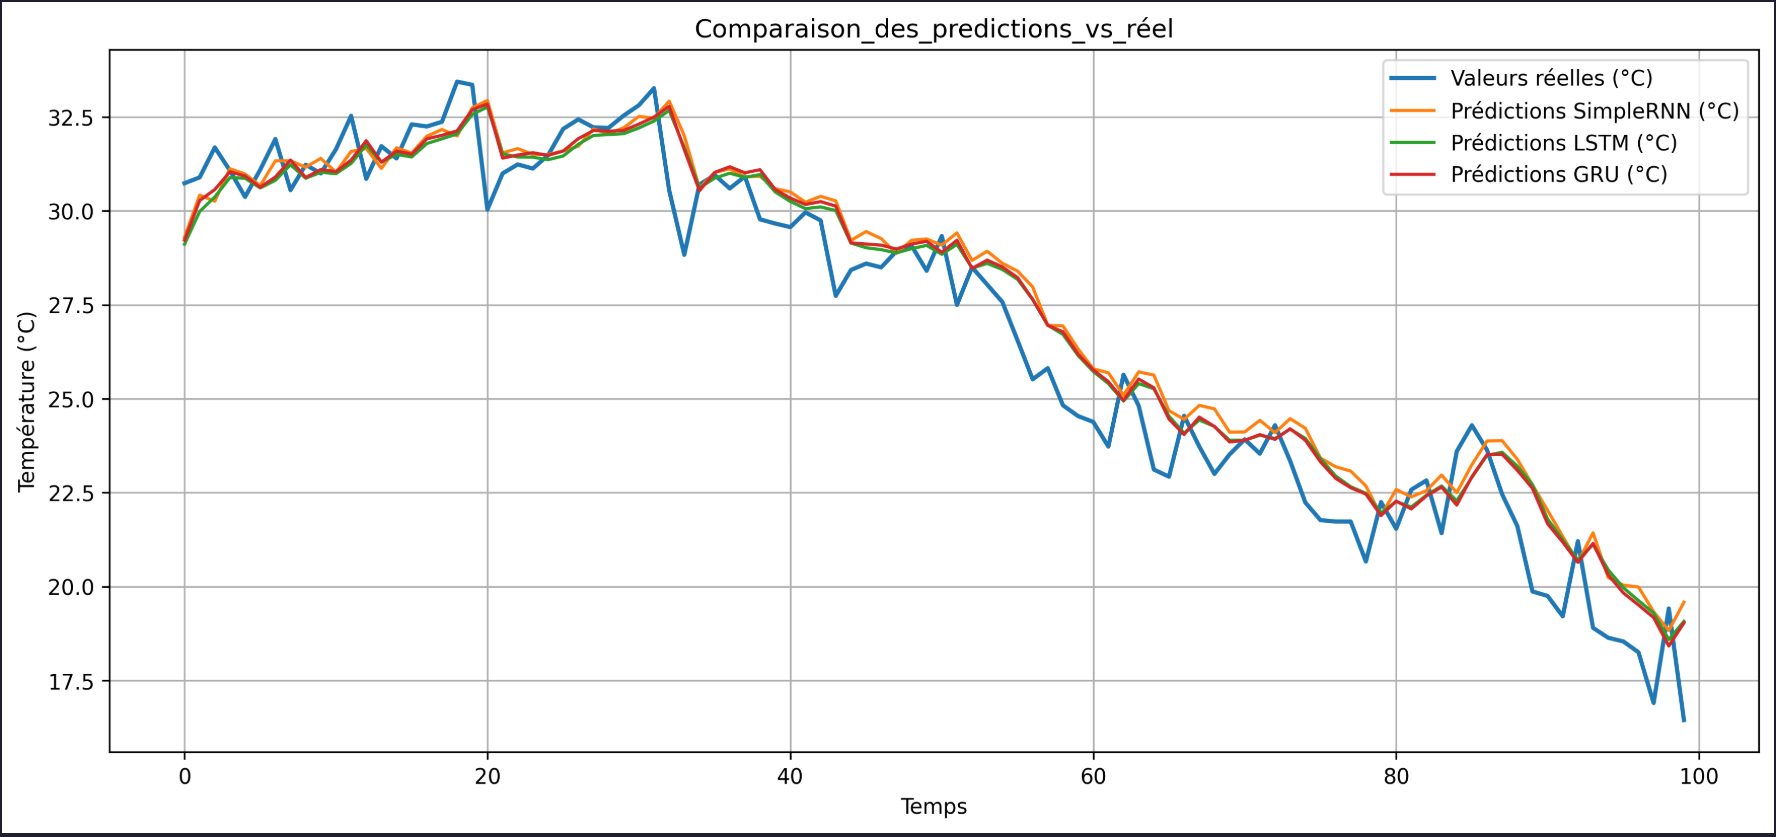

##### 128 Units

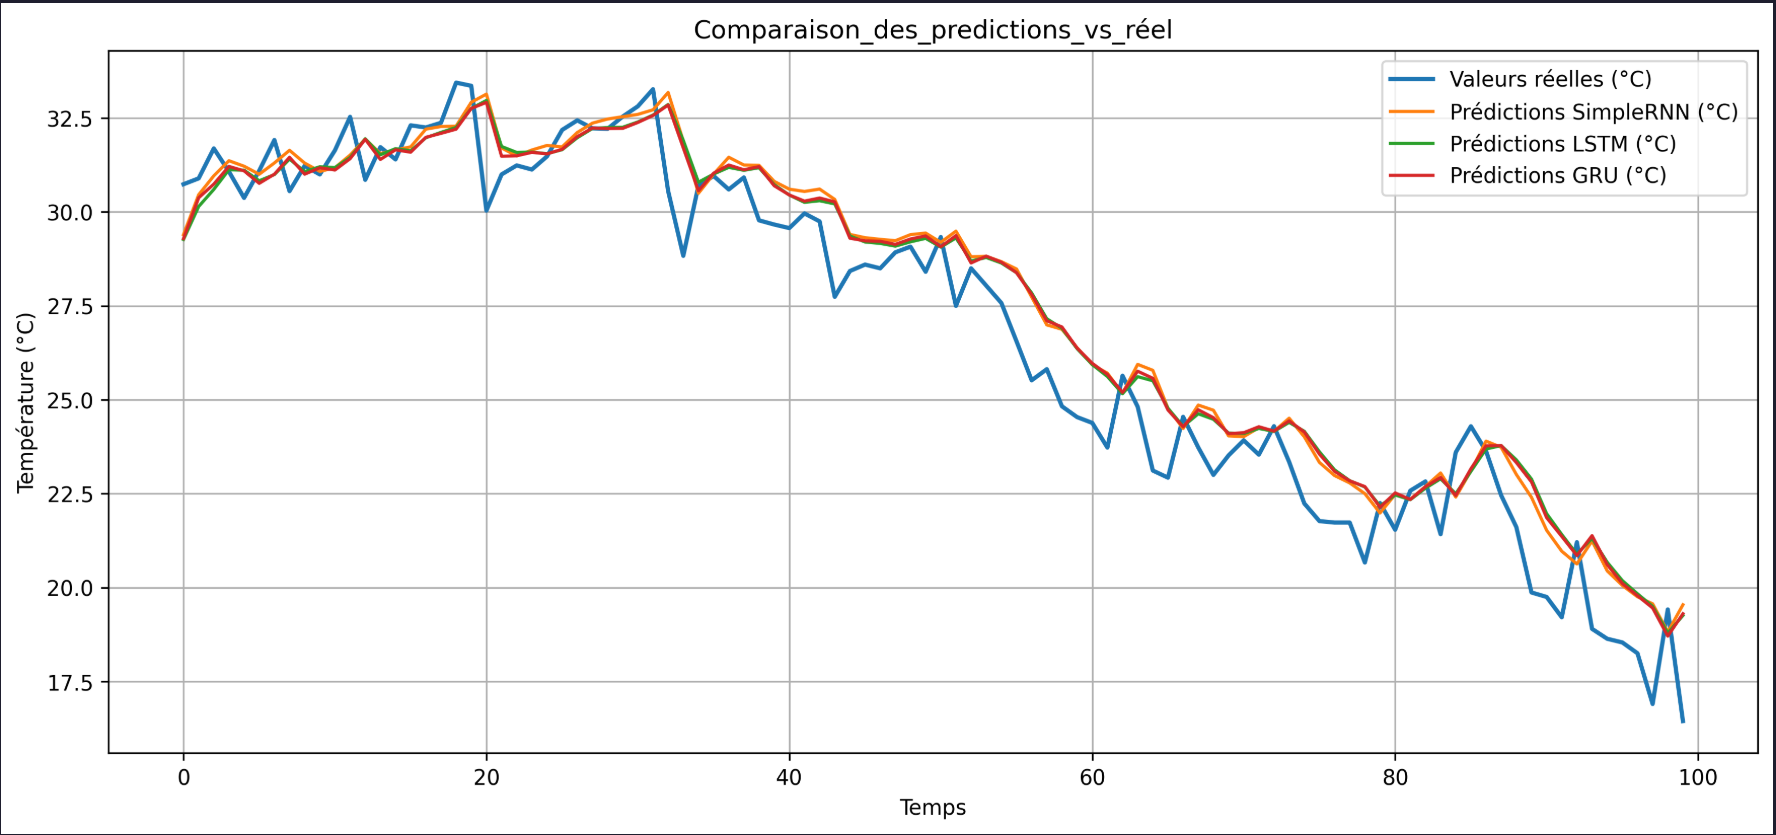

Nous remarquons que l’influence du nombre d’unités reste relativement limitée. Il n’est donc pas nécessaire d’augmenter ce paramètre de manière excessive, ce qui permet de contenir la complexité du modèle.

On pourrait considérer que l’erreur est relativement élevée, mais cela peut s’expliquer par les conditions de mesure : le bruit présent dans les données (notamment dû aux moyennes quotidiennes de température) pourrait en être la principale cause. Malgré cela, les résultats obtenus restent globalement satisfaisants.

#### Courbes de perte

##### 32 Units

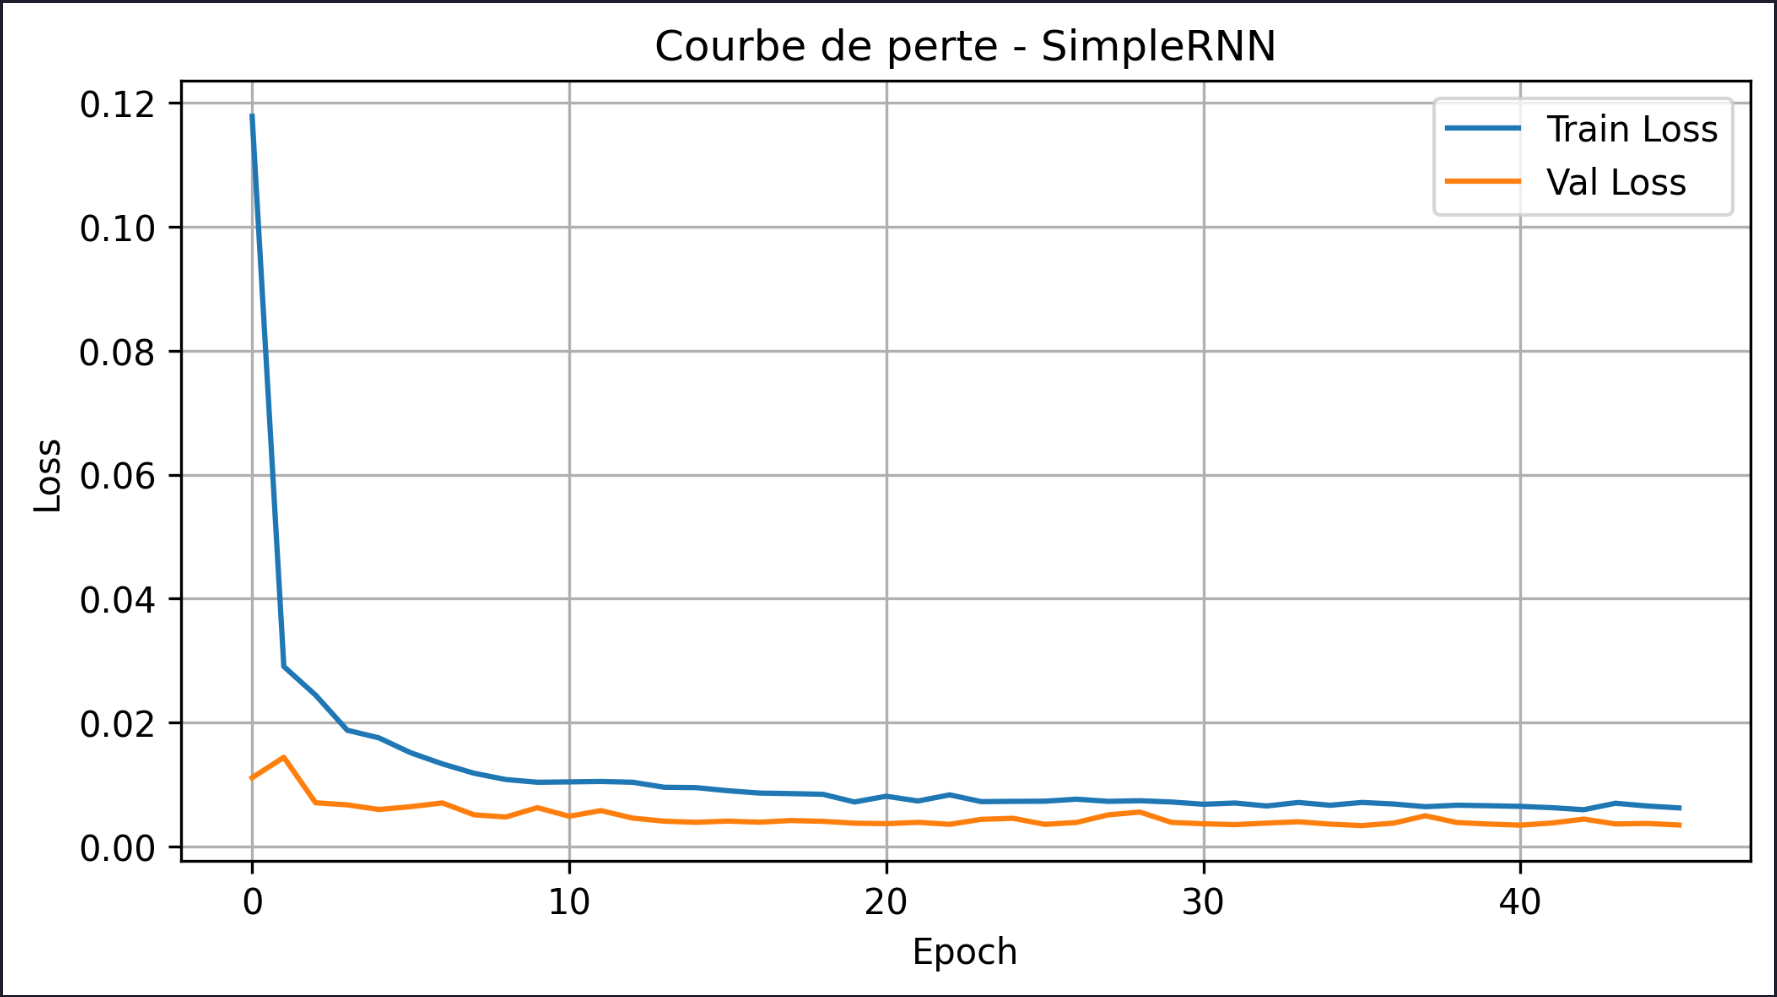

##### 64 Units

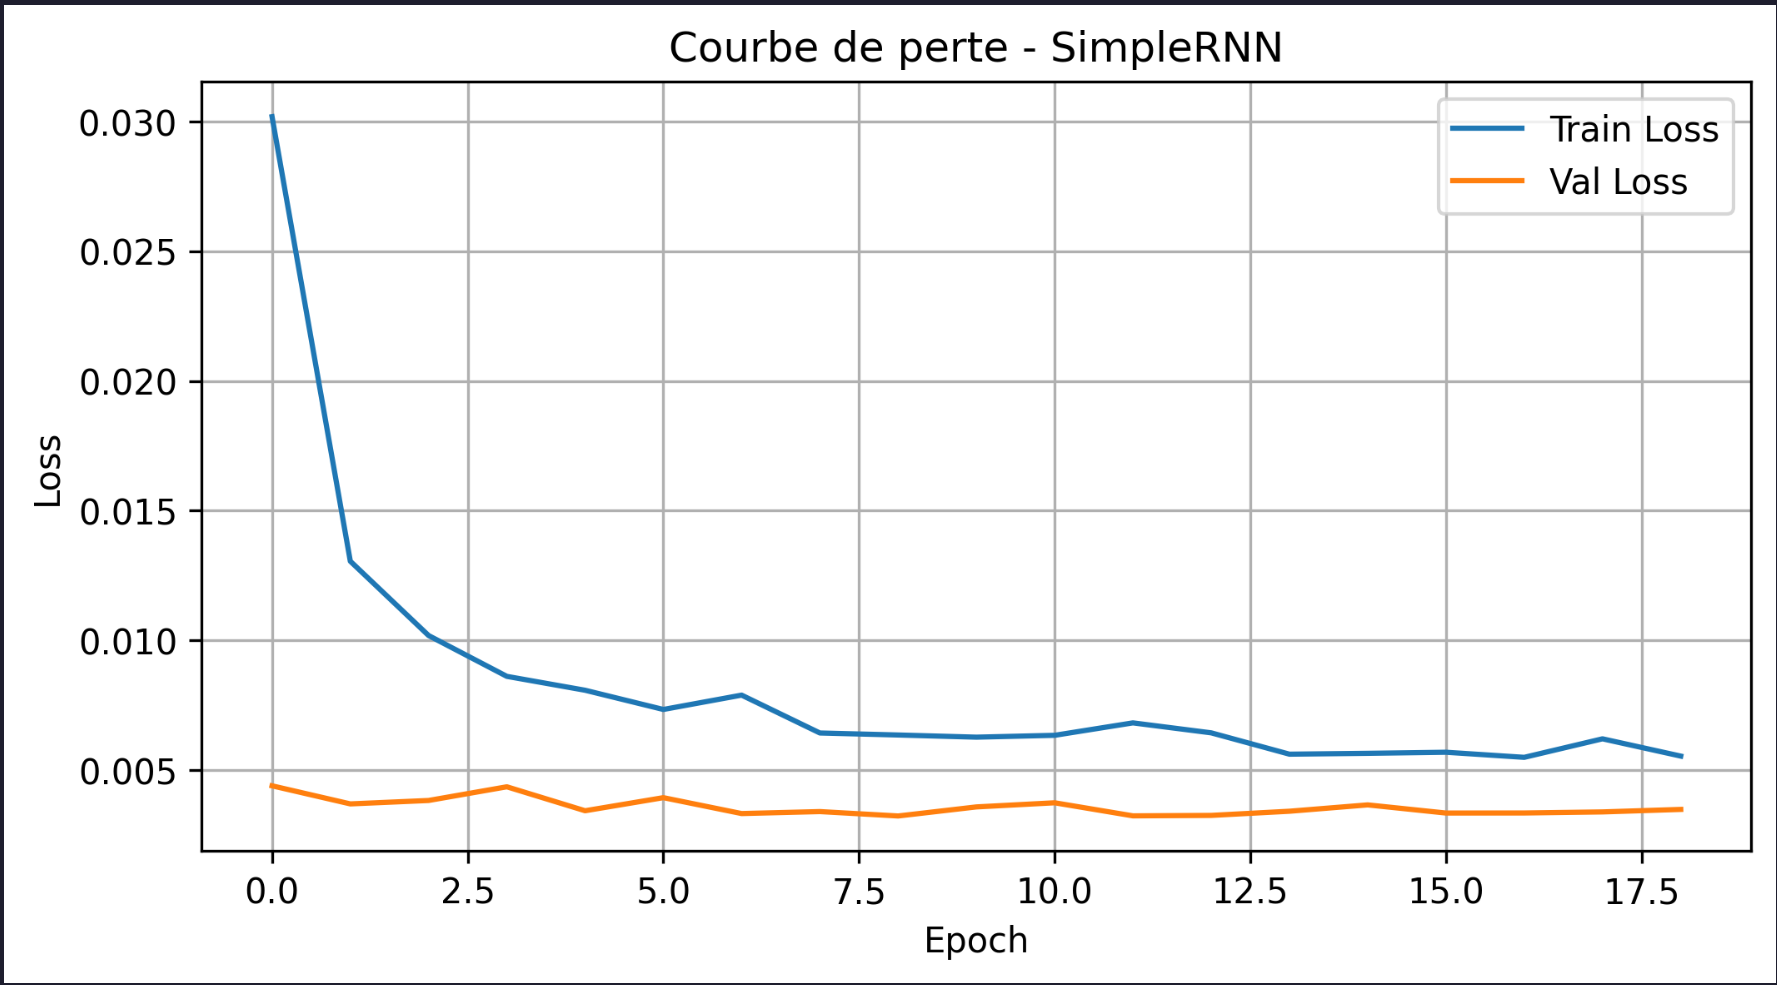

##### 128 Units

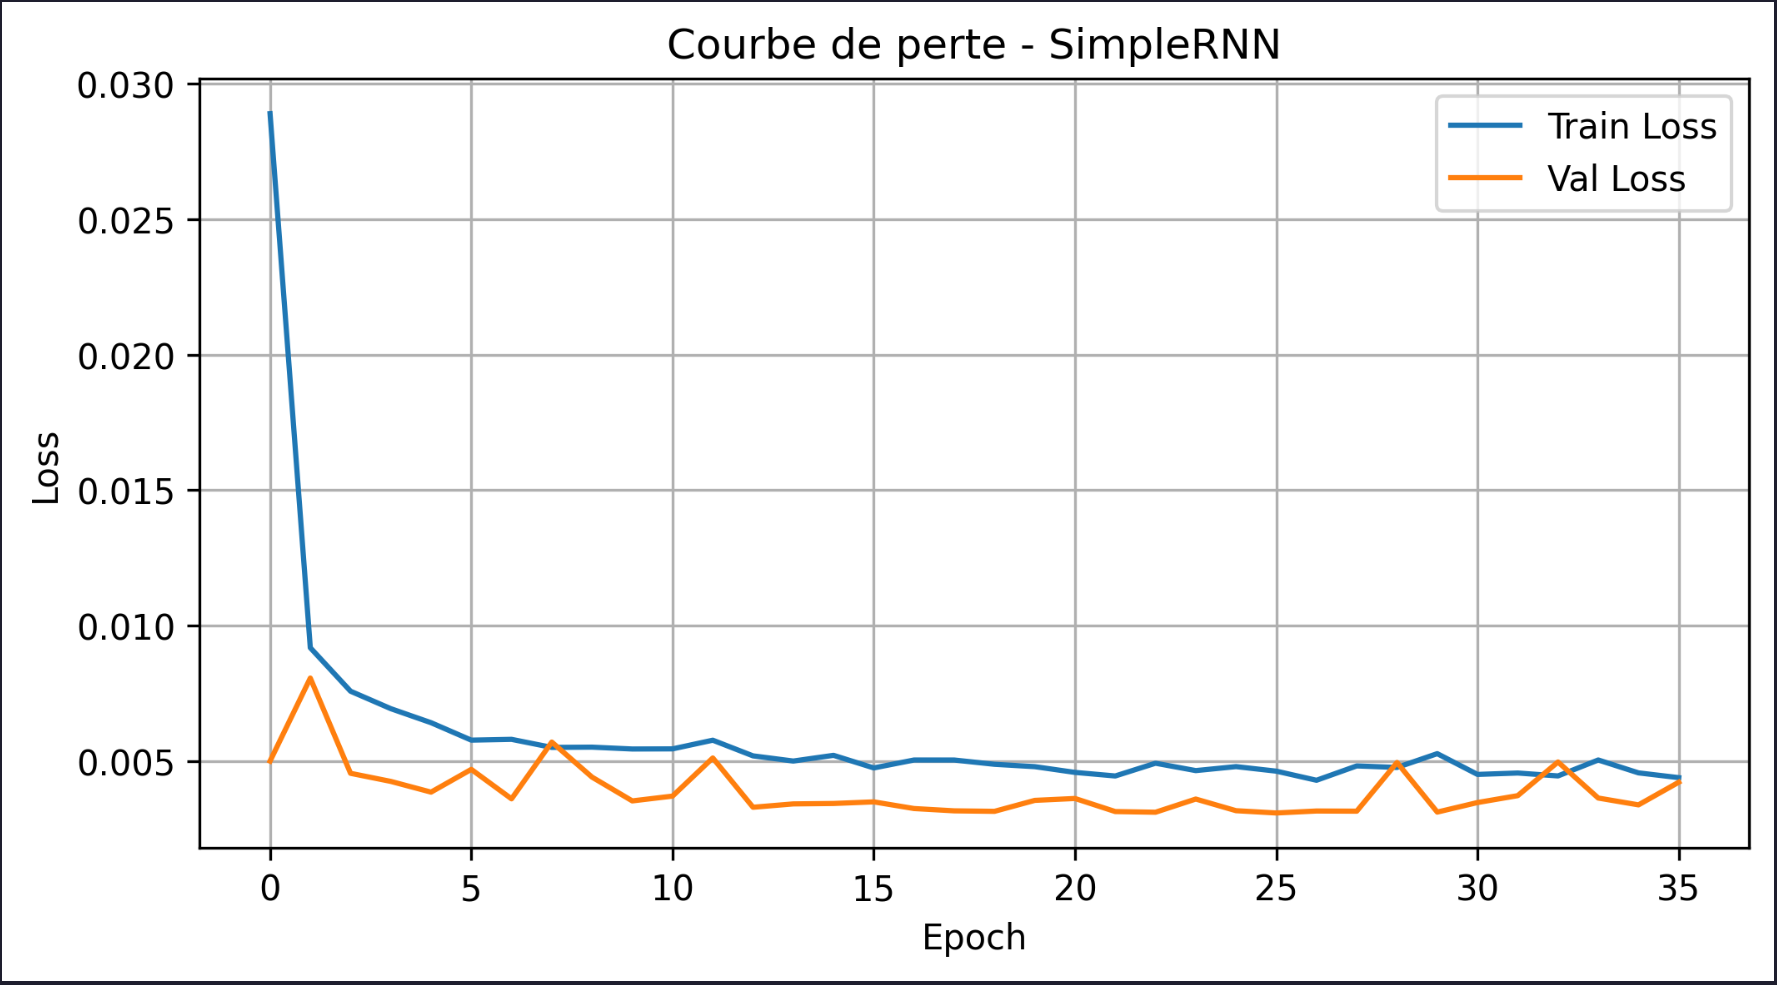


On remarque que le passage de 32 à 64 unités a un impact significatif : la valeur de perte initiale passe d’environ 0.12 à 0.03. Cela indique que le modèle devient plus expressif et parvient à mieux capturer les motifs dès le début de l’apprentissage.

En revanche, passer de 64 à 128 unités n’apporte pas d’amélioration notable des performances. Cela suggère qu’au-delà d’un certain seuil, augmenter le nombre d’unités n’apporte pas de gain significatif, mais augmente la complexité du modèle de manière inutile.

On observe également que le nombre d’époques nécessaires est deux fois plus faible avec 64 unités, ce qui réduit le temps d’entraînement. Nous retiendrons donc 64 unités pour notre meilleur modèle.

#### Tableau de performance

##### 32 Units

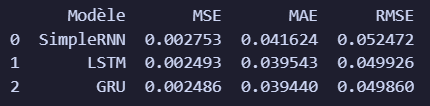

##### 64 Units

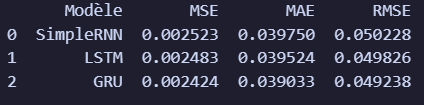

##### 128 Units

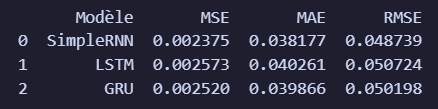

Nous pouvons conclure quelques informations interessantes : 

1. GRU est le plus performant dans l’ensemble, notamment avec 64 unités. Il obtient le plus petit MSE (0.00242) et RMSE (0.0492), ce qui montre une bonne qualité de prédiction.

2. LSTM fonctionne bien à 64 unités, mais ses résultats se dégradent un peu à 128 unités. Cela peut indiquer un surapprentissage ou une complexité trop élevée.

3. SimpleRNN s’améliore quand on augmente les unités. Son MSE baisse régulièrement entre 32 et 128 unités, ce qui montre que le modèle profite de plus de capacité.

---

### Empilement de couches (return_sequence = true)

#### Prédictions

##### Pas d'empilement

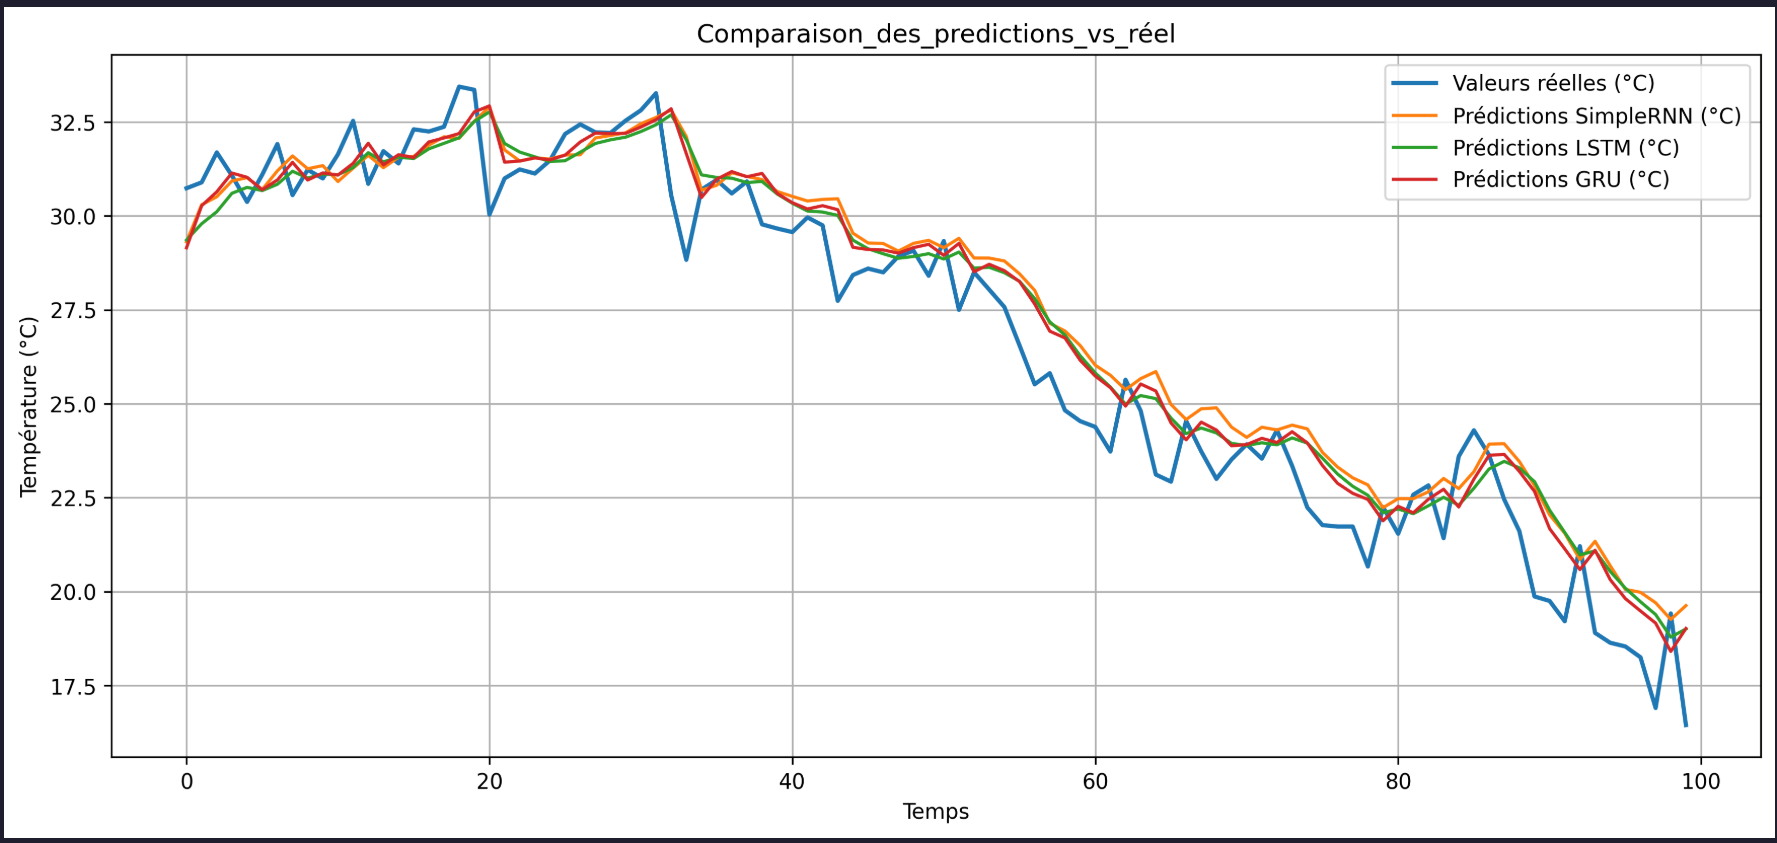

##### Empilement

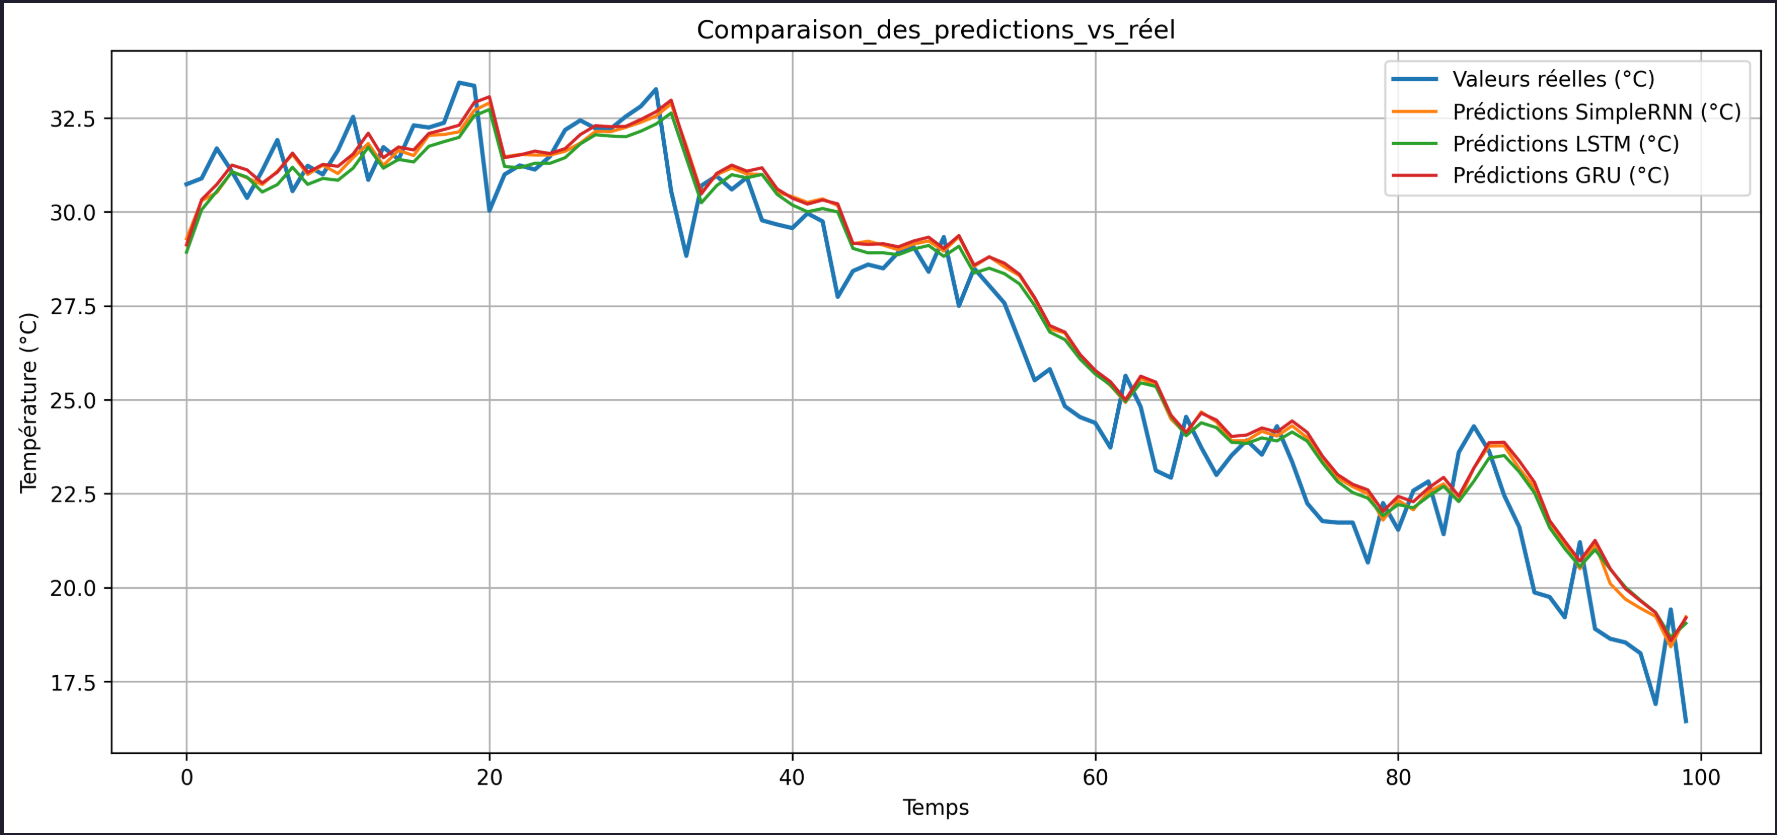


La deuxième couche réduit l’erreur visuelle d’environ un dixième de degré — c’est appréciable, mais cela ne change pas radicalement la qualité des prédictions.

Augmenter la complexité du modèle avec une couche supplémentaire ne semble pas justifié si l’on se base uniquement sur l’amélioration des prédictions.

#### Courbes de perte

##### Pas d'empilement

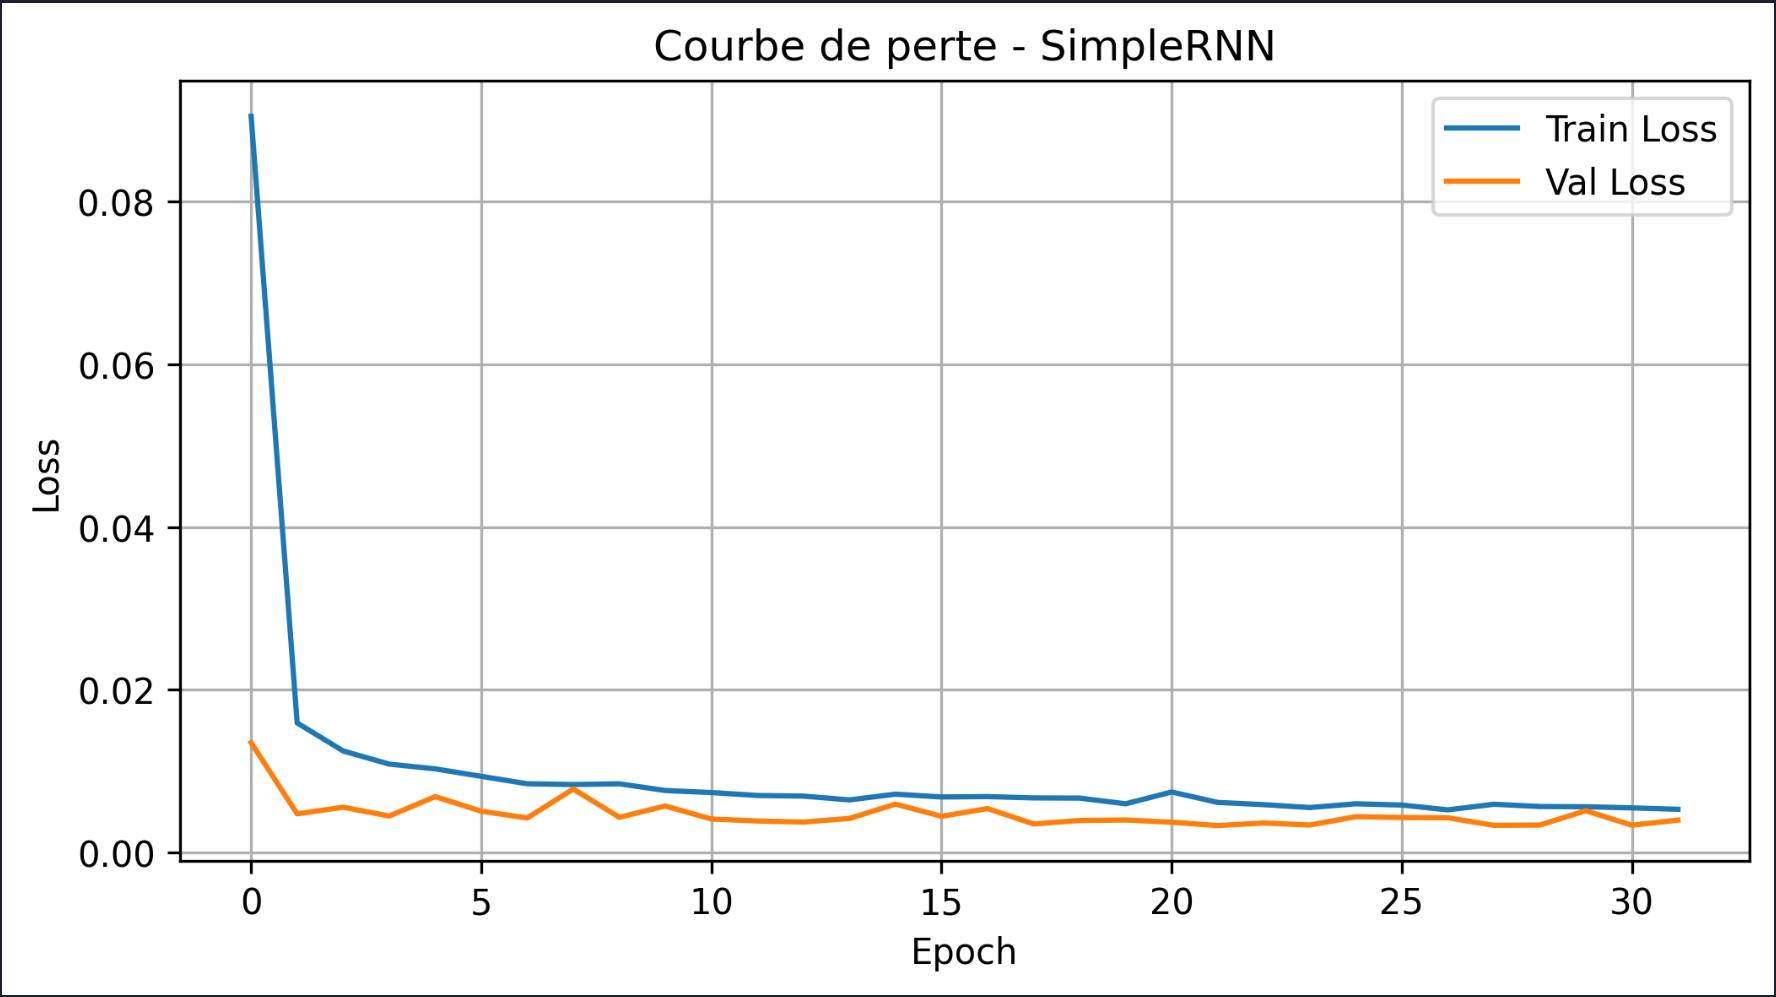

##### Empilement

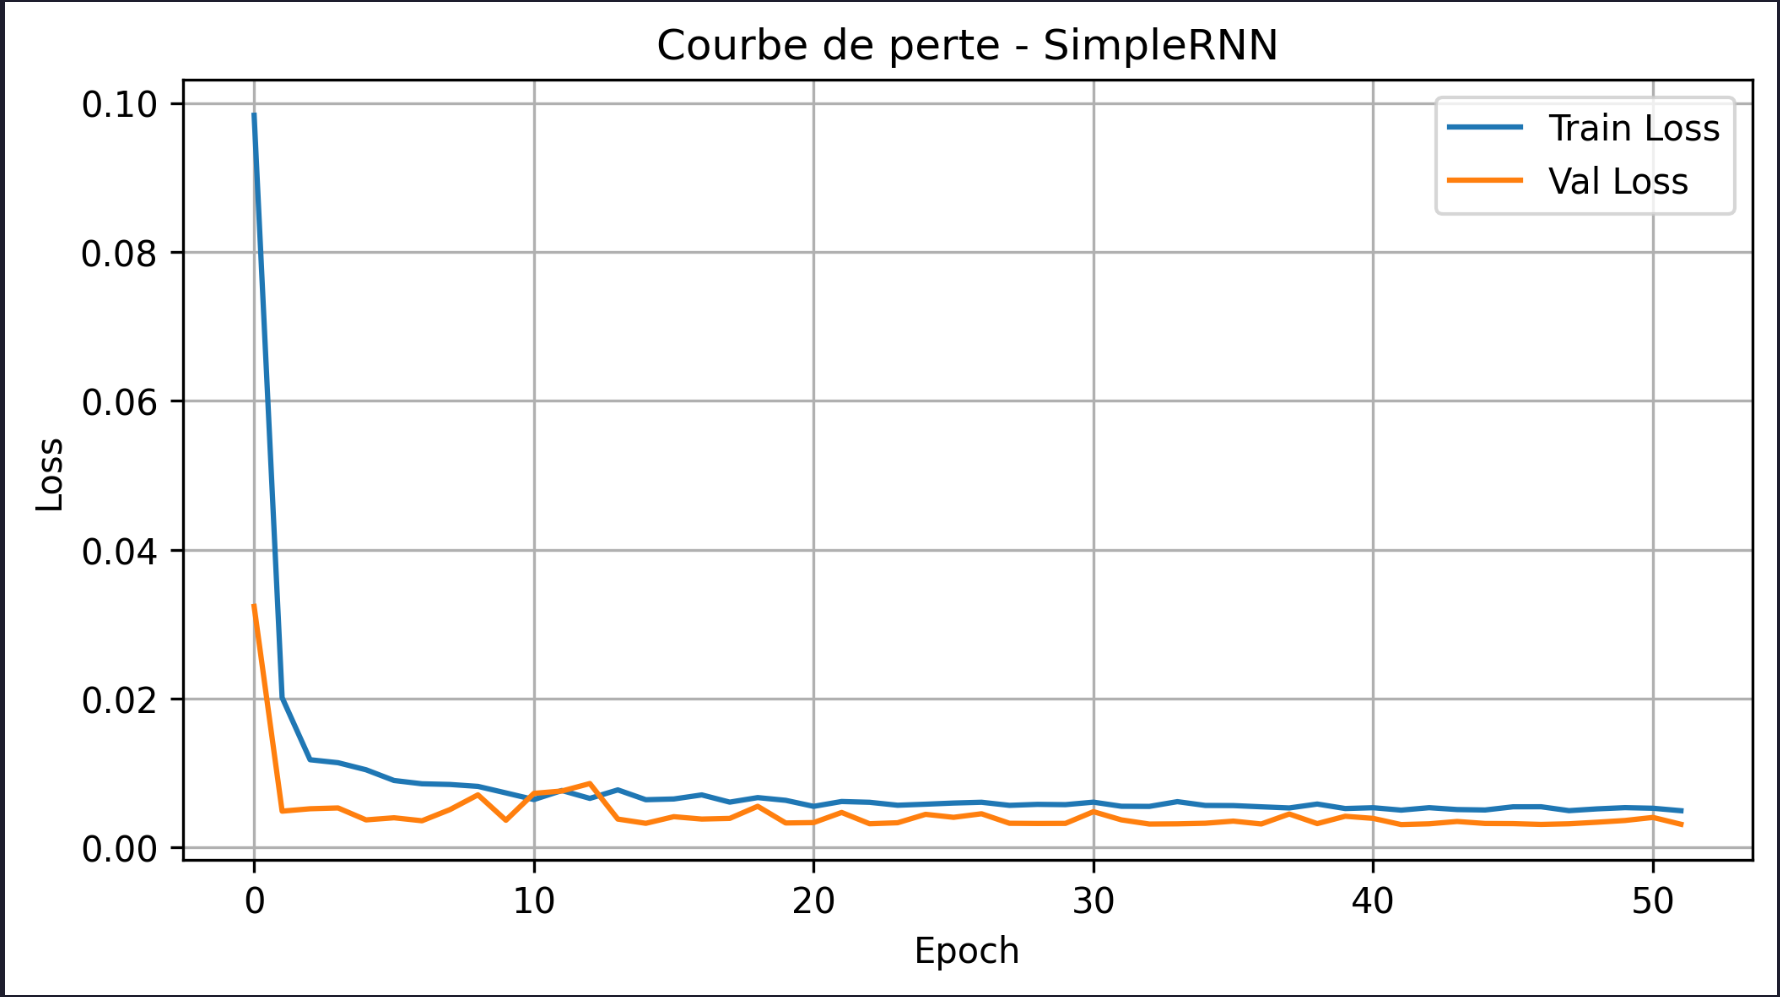

Nous remarquons que l’empilement de couches n’a pas d’effet significatif sur la valeur de perte initiale. En revanche, cela augmente souvent le nombre d’époques nécessaires pour converger, ce qui reflète une plus grande complexité du modèle.

#### Tableau de performance

##### Pas d'empilement



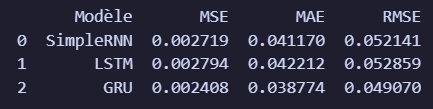

##### Empilement

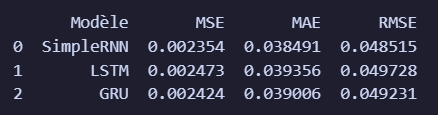

L’empilement des couches RNN apporte un gain réel en performance sur ce problème, en particulier pour les architectures plus simples comme le SimpleRNN. Cela suggère que la profondeur supplémentaire permet au réseau de mieux modéliser les relations temporelles complexes présentes dans la série.

Nous ajouterons tout de même cette couche supplémentaire, car les gains de performance observés restent intéressants, même si cela augmente légèrement la complexité du modèle.

---

### Dropout

Le **dropout** est une technique de régularisation qui vise à désactiver aléatoirement un certain pourcentage de neurones pendant l'entraînement pour éviter le surapprentissage. Nous allons voir son impact sur les trois architectures RNN testées : **SimpleRNN**, **LSTM** et **GRU**, en observant l'évolution de leurs performances selon différents taux de dropout (0.0, 0.2, 0.4, 0.7)

Nous allons seulement faire varier le drop out donc voici les valeurs des autres paramètres :

- UNITS = 64
- DROPOUT = 0.4 or 0.2 or 0.0 or 0.7
- STACKED = False
- USE_BIDIRECTIONAL = True
- AJOUTER_BRUIT = True
- BRUIT_SIGMA = 0.05

#### Dropout = 0.0 : Meilleures performances globales

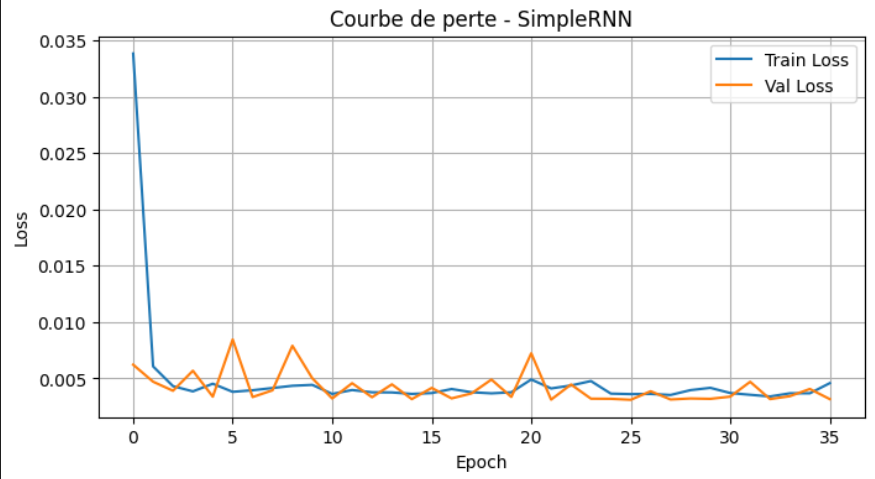

On remarque qu'il faut 35 itérations pour atteindre la MSE minimale et qu'elle diminue drastiquement au cours des 5 premières ce qui peut s'expliquer par l’absence de régularisation, qui permet au modèle d’apprendre très rapidement en exploitant pleinement la structure des données.


| Modèle        | MSE          | MAE          | RMSE         |
| ------------- | ------------ | ------------ | ------------ |
| **SimpleRNN** | **0.002451** | **0.039169** | **0.049506** |
| LSTM          | 0.002506     | 0.039553     | 0.050064     |
| GRU           | 0.002497     | 0.039512     | 0.049973     |

Quand le drop out est désactivé tous les modèles performent bien, avec une précision très élevée et comme on peut le voir dans le tableau ci dessous des erreurs très faibles.

Cependant, cette rapidité d’apprentissage peut aussi exposer le modèle à un **surapprentissage** à plus long terme, surtout si le dataset est bruité ou complexe.

Mais on garde le **bruit d’entrée** (`BRUIT_SIGMA = 0.05`) : cela joue un rôle de régularisation externe ressemblant au “data augmentation” mais on peut aussi notifier et ce pour l'ensemble de nos tests que le réseau reste de taille modeste (64 units et une couche ) ce qui diminue également les risques de surapprentissage. Le modèle ne part donc **pas** totalement en sur-apprentissage ; l’injection de bruit stabilise encore la généralisation.


#### Dropout = 0.2 : compromis entre précision et régularisation

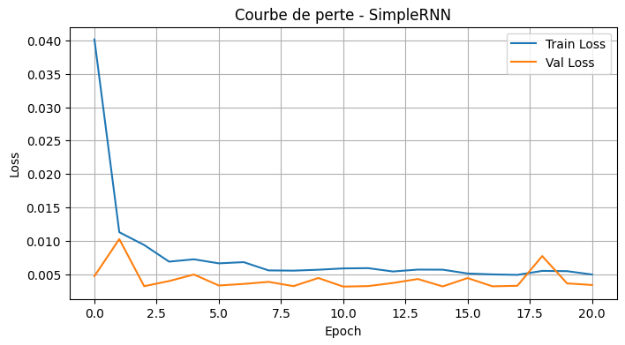

On remarque la MSE minimale est atteinte en 20 itérations lors que pour un dropout de 0.0  elle se faisait en 35 soit 15 de moins. Ce comportement s’explique probablement par une meilleure généralisation dès les premières phases d’apprentissage.

| Modèle    | MSE          | MAE          | RMSE         |
| --------- | ------------ | ------------ | ------------ |
| SimpleRNN | 0.002697     | 0.041399     | 0.051935     |
| LSTM      | 0.002725     | 0.041226     | 0.052200     |
| **GRU**   | **0.002624** | **0.040350** | **0.051228** |

C'est ce taux de drop out qu'on a considéré comme le "meilleur" lors de nos tests.

À ce niveau, les modèles sont légèrement régularisés, ce qui empêche l’overfitting tout en gardant de bonnes performances. Le GRU prend ici un léger avantage, probablement grâce à sa structure à deux portes qui équilibre bien la mémoire courte et la longue.

Les performances sont assez proches, ce qui montre que le dropout à 0.2 n’impacte pas trop négativement les modèles, tout en rendant l’apprentissage plus stable.

#### Dropout = 0.4 : régularisation plus forte, LSTM en tête

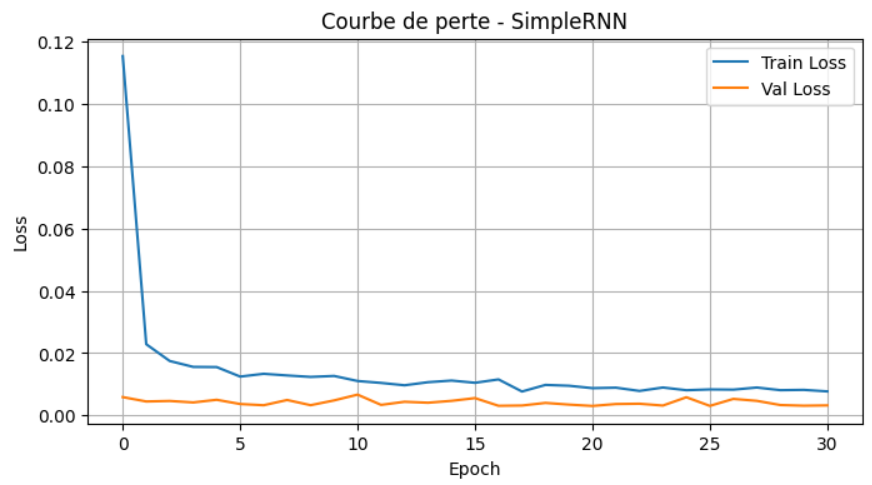


| Modèle    | MSE          | MAE          | RMSE         |
| --------- | ------------ | ------------ | ------------ |
| SimpleRNN | 0.002746     | 0.041723     | 0.052400     |
| **LSTM**  | **0.002640** | **0.040655** | **0.051382** |
| GRU       | 0.002705     | 0.041054     | 0.052013     |


Avec un **dropout** plus important (0.4), les performances globales chutent légèrement pour tous les modèles. Cette fois c’est LSTM qui s’en sort le mieux. Ce qui pourrait expliquer que sa structure complexe à trois portes le rend plus résistant à une perte aléatoire de neurones, car il peut mieux contrôler quelles informations garder ou oublier mais en étant moins rapide GRU ou Simple RNN.

#### Dropout = 0.7 : trop de régularisation, chute de performance

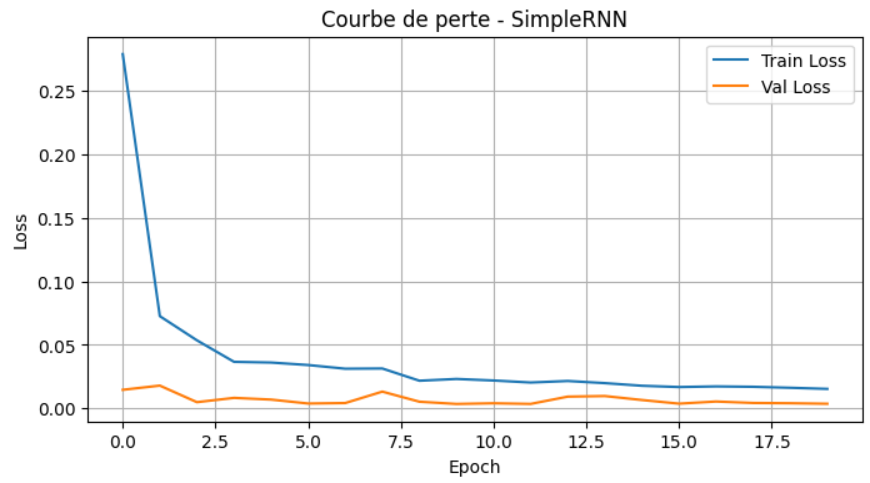


| Modèle    | MSE          | MAE          | RMSE         |
| --------- | ------------ | ------------ | ------------ |
| GRU       | **0.003017** | **0.043276** | **0.054925** |
| SimpleRNN | 0.002952     | 0.043560     | 0.054334     |
| LSTM      | 0.003120     | 0.044440     | 0.055854     |


Avec un taux de **dropout** très élevé (70 % des neurones désactivés), les trois modèles souffrent : les erreurs augmentent, et les écarts entre eux s’atténuent. Curieusement, GRU reprend la tête, sans doute parce qu’il est plus simple que LSTM mais mieux équipé que SimpleRNN pour gérer la mémoire.

Cela montre bien qu’un dropout trop fort nuit à la capacité d’apprentissage, LSTM semble même être le plus affecté ici.

#### Interprétations et conclusions sur les différentes courbes de température

##### 0.0

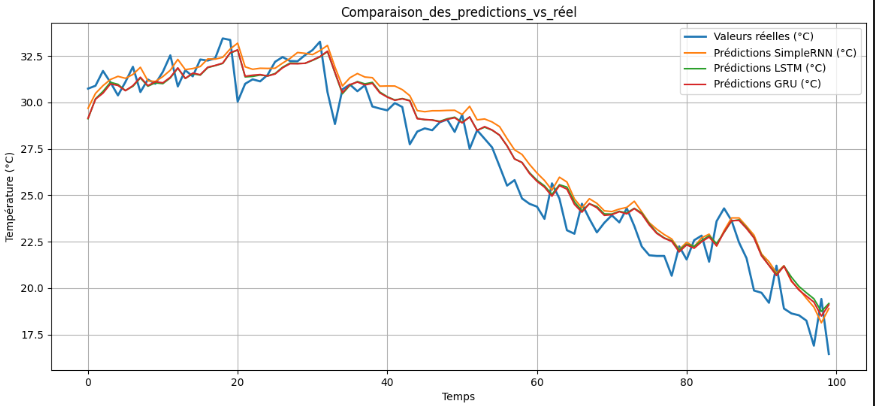

##### 0.2

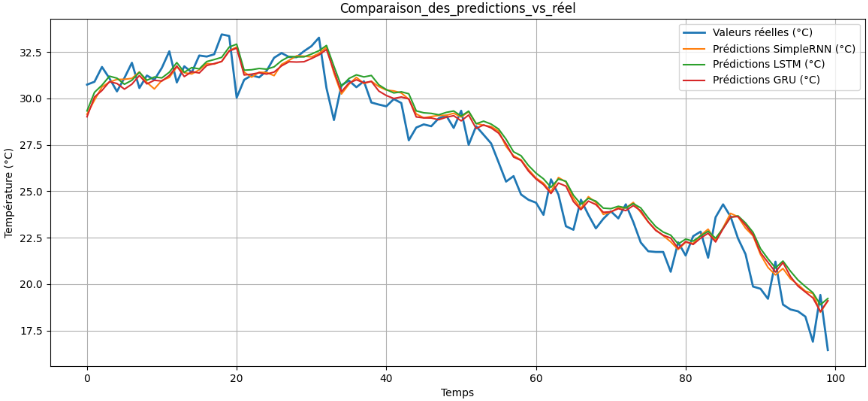

##### 0.4

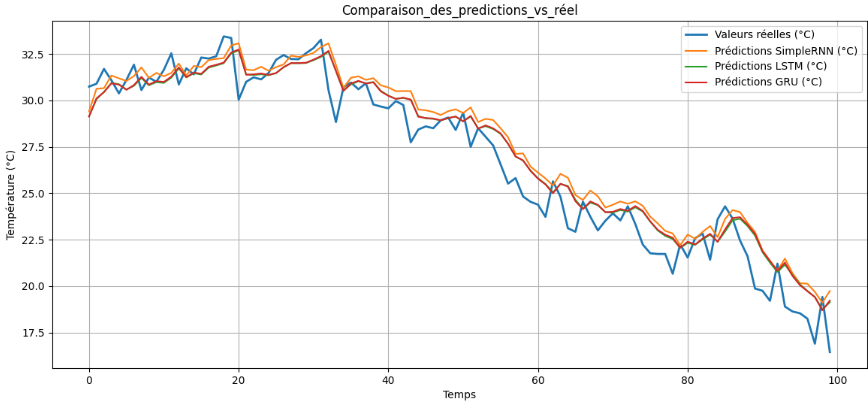

##### 0.7

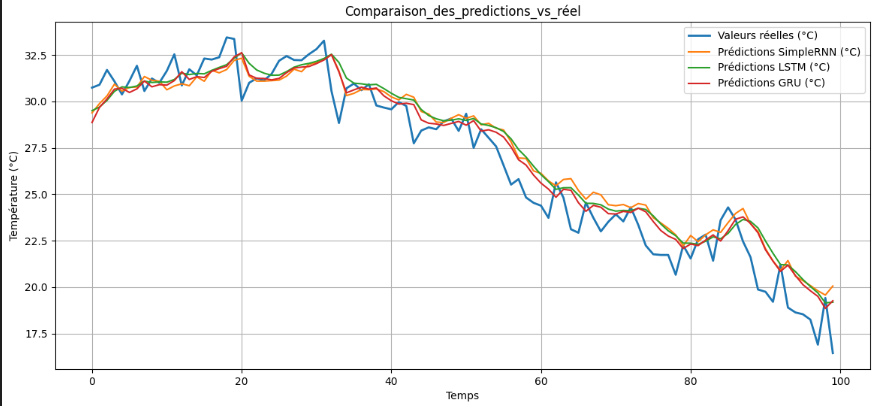

- **Dropout 0 - 0.2** donne les meilleurs compromis : courbe plus vivante, métriques minimales.
- À plus petit ou égal à 0.4 le réseau sous-apprend ; à 0.7 les pics/creux sont trop amortis et l’erreur grimpe de ~20 %.
- Puisque on injecte déjà du bruit et que le modèle reste petit, le dropout sert surtout à pénaliser la précision du modèle. Pour que un surapprentissage survienne du à un drop trop bas ou inexistant il faudrait supprimer ce bruit d'entrée.

---

### Bidirectionnal

Permet de traiter les données dans les 2 sens :

- **Passé -> Futur** (sens normal)
- **Futur -> Passé** (sens inverse)

Donc dans notre cas le but est de prévoir en utilisant à la fois les tendances passées et futures.

#### Sans

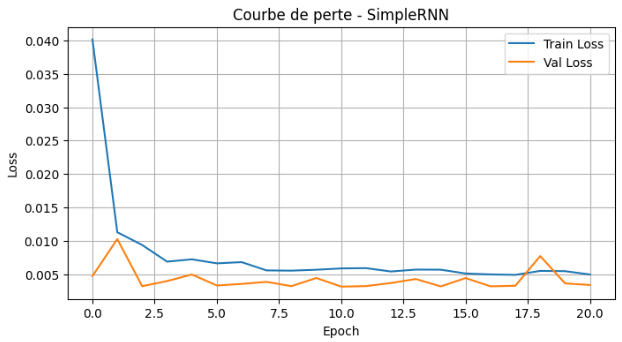


| Modèle    | MSE          | MAE          | RMSE         |
| --------- | ------------ | ------------ | ------------ |
| SimpleRNN | 0.002697     | 0.041399     | 0.051935     |
| LSTM      | 0.002725     | 0.041226     | 0.052200     |
| **GRU**   | **0.002624** | **0.040350** | **0.051228** 

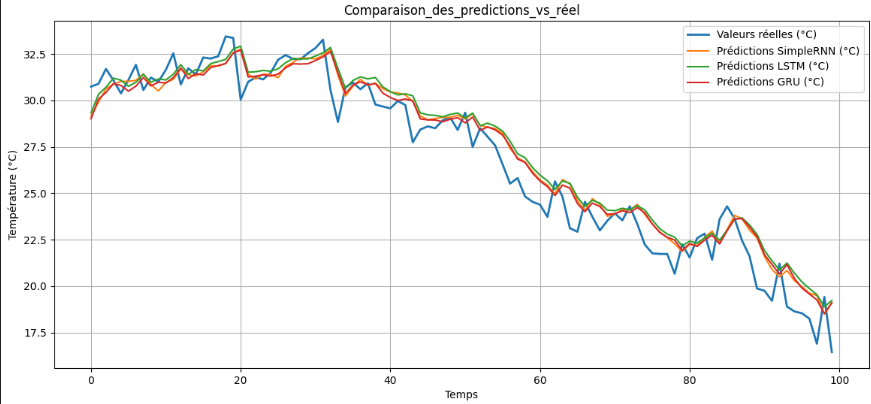

#### Avec

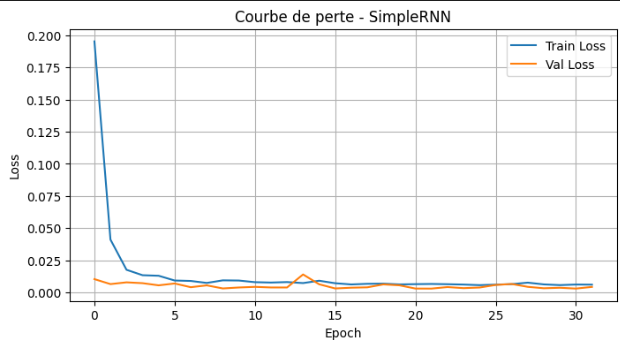


| Modèle        | MSE          | MAE          | RMSE         |
| ------------- | ------------ | ------------ | ------------ |
| **SimpleRNN** | **0.002416** | **0.038776** | **0.049149** |
| GRU           | 0.002446     | 0.039365     | 0.049462     |
| LSTM          | 0.002666     | 0.041042     | 0.051635     |


IMAGE ?????????????????????????


#### Interprétation et conclusion 

Dans le cas d'une série temporelle de températures précises sans données manquantes comme notre dataset , l'utilisation d'un RNN bidirectionnel n'est pas nécessaire pour les raisons suivantes :

-  La réduction de l'erreur est trop faible pour justifier la complexité ajoutée.
- La version unidirectionnelle obtient déjà des performances excellentes
- Temps d’entraînement 60% plus long (32 epochs vs 20).
- Le modèle bidirectionnel **a besoin de connaître le futur** dans la fenêtre d’analyse ce qui est inutilisable pour prédire des températures futures en conditions réelles


---

## Meilleur modèle

## Paramètres

- Units = 64
- Empilement = True
- Dropout = 0.2
- Bidirectionnal = False

### Prédictions

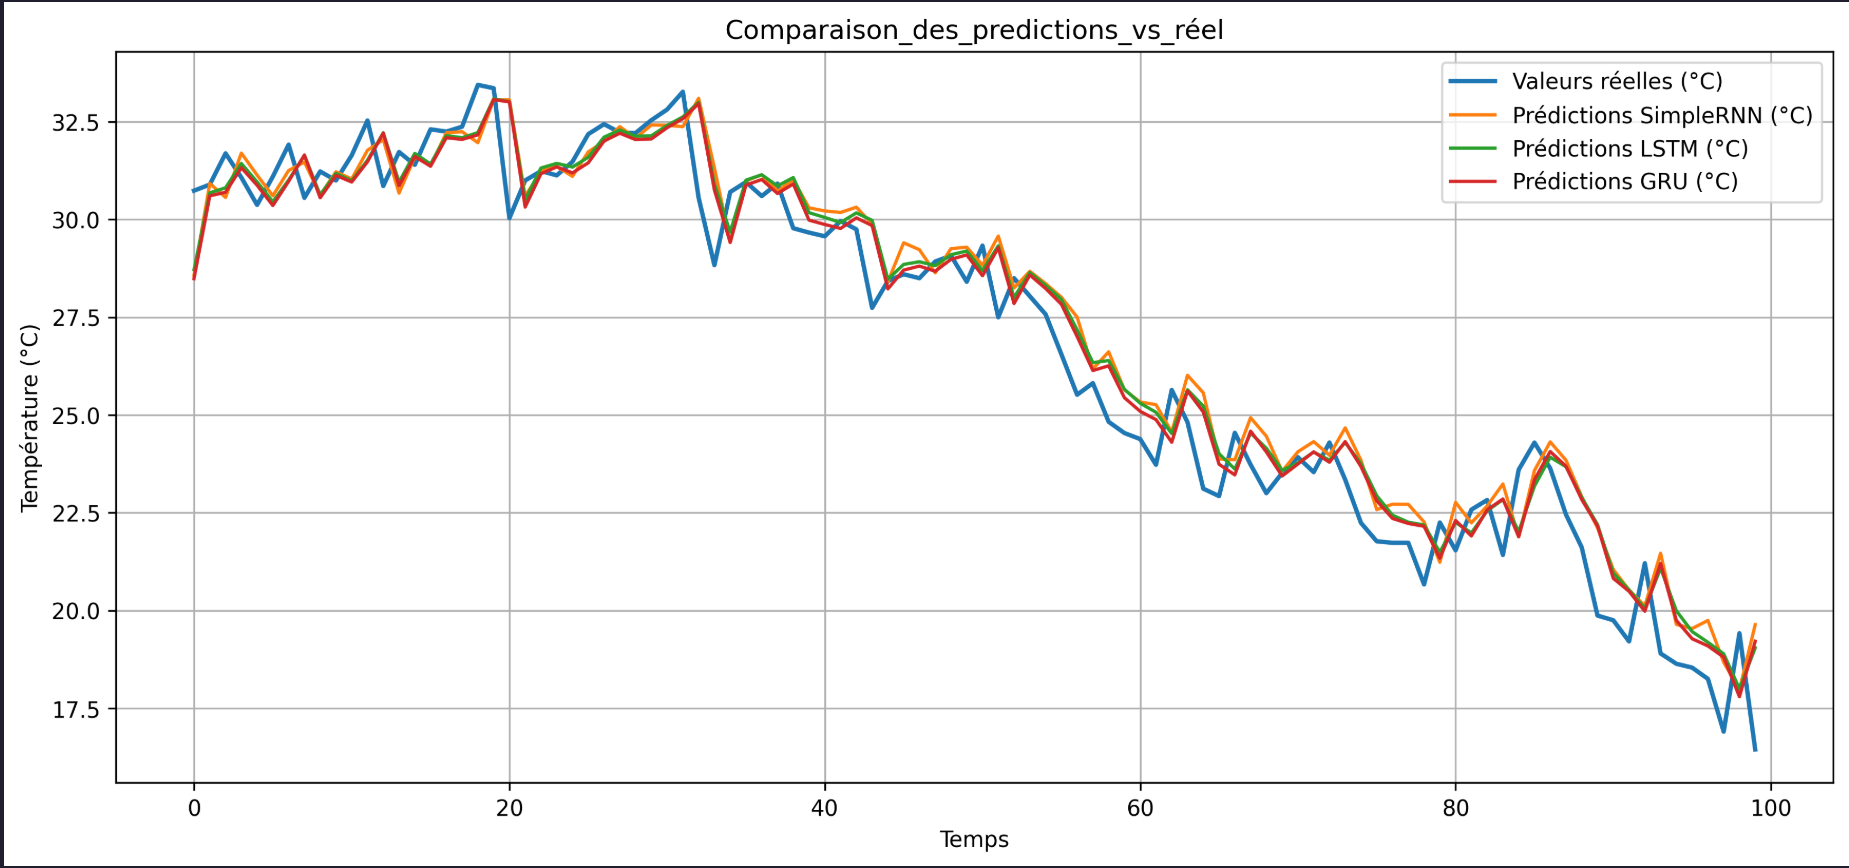

### Courbes de perte

#### SimpleRNN

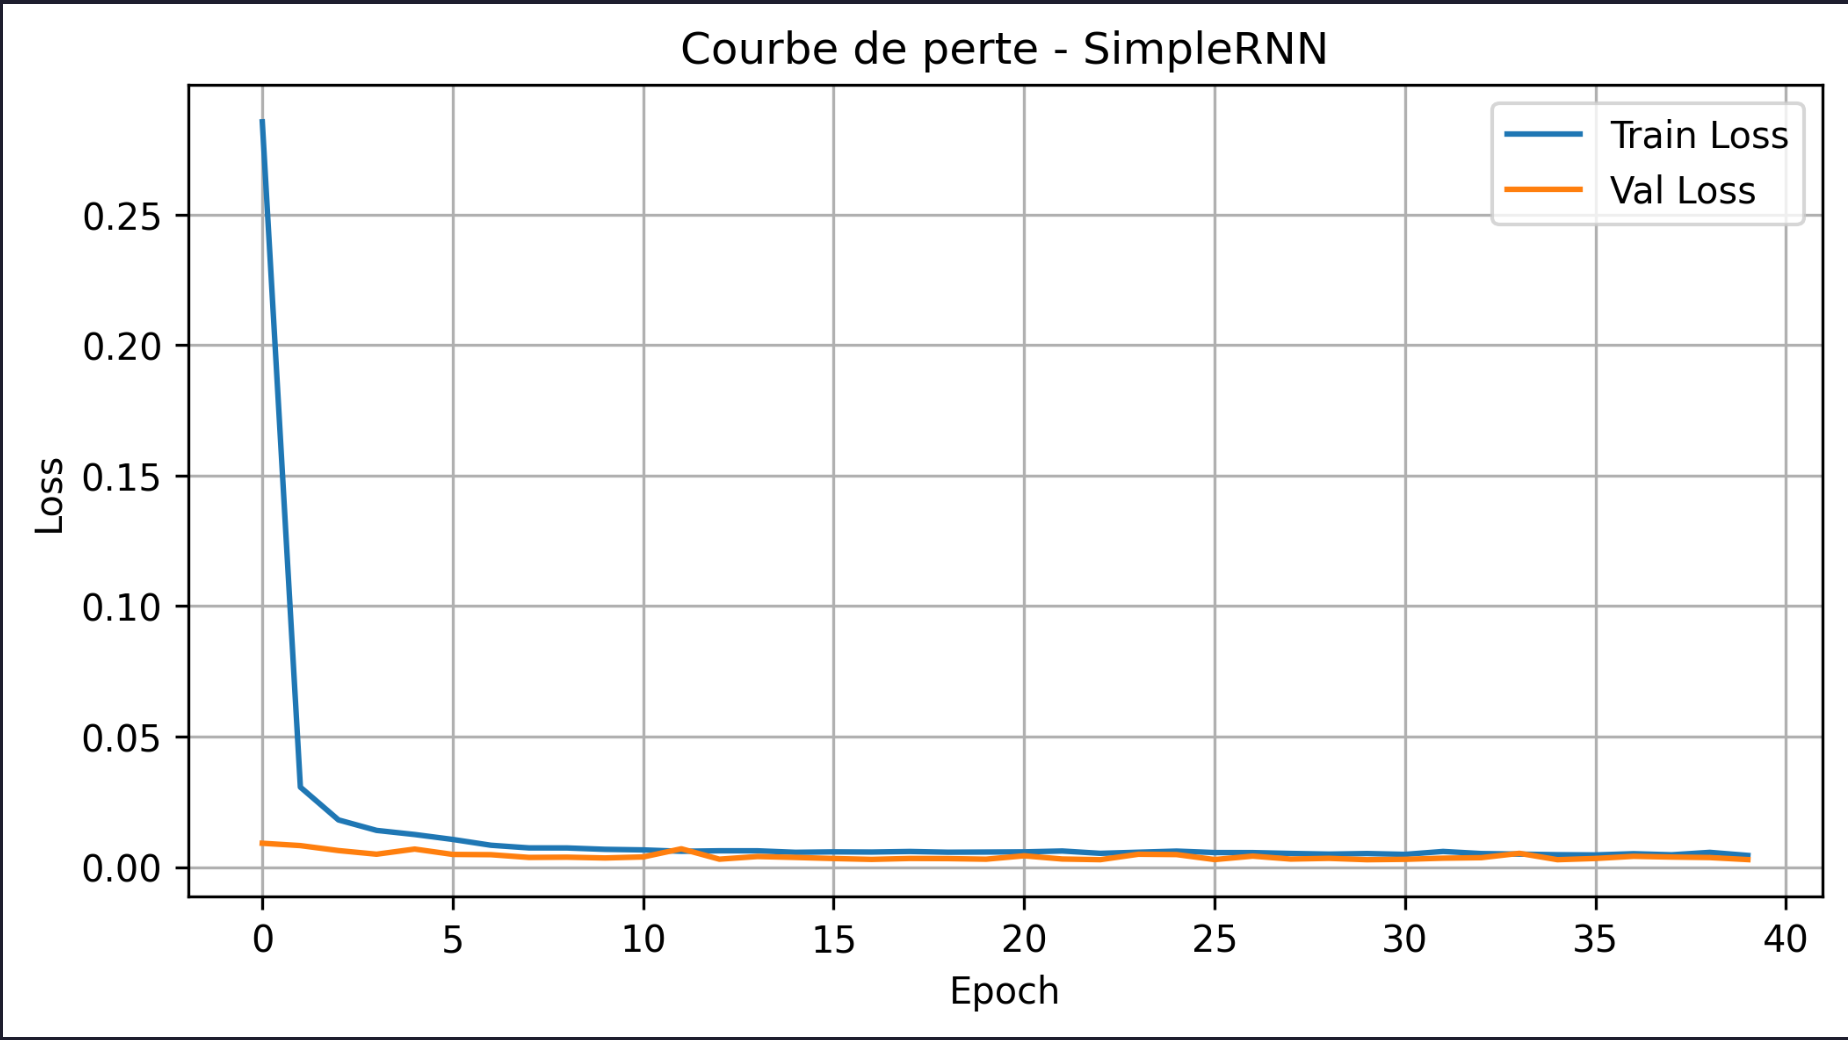


#### LSTM

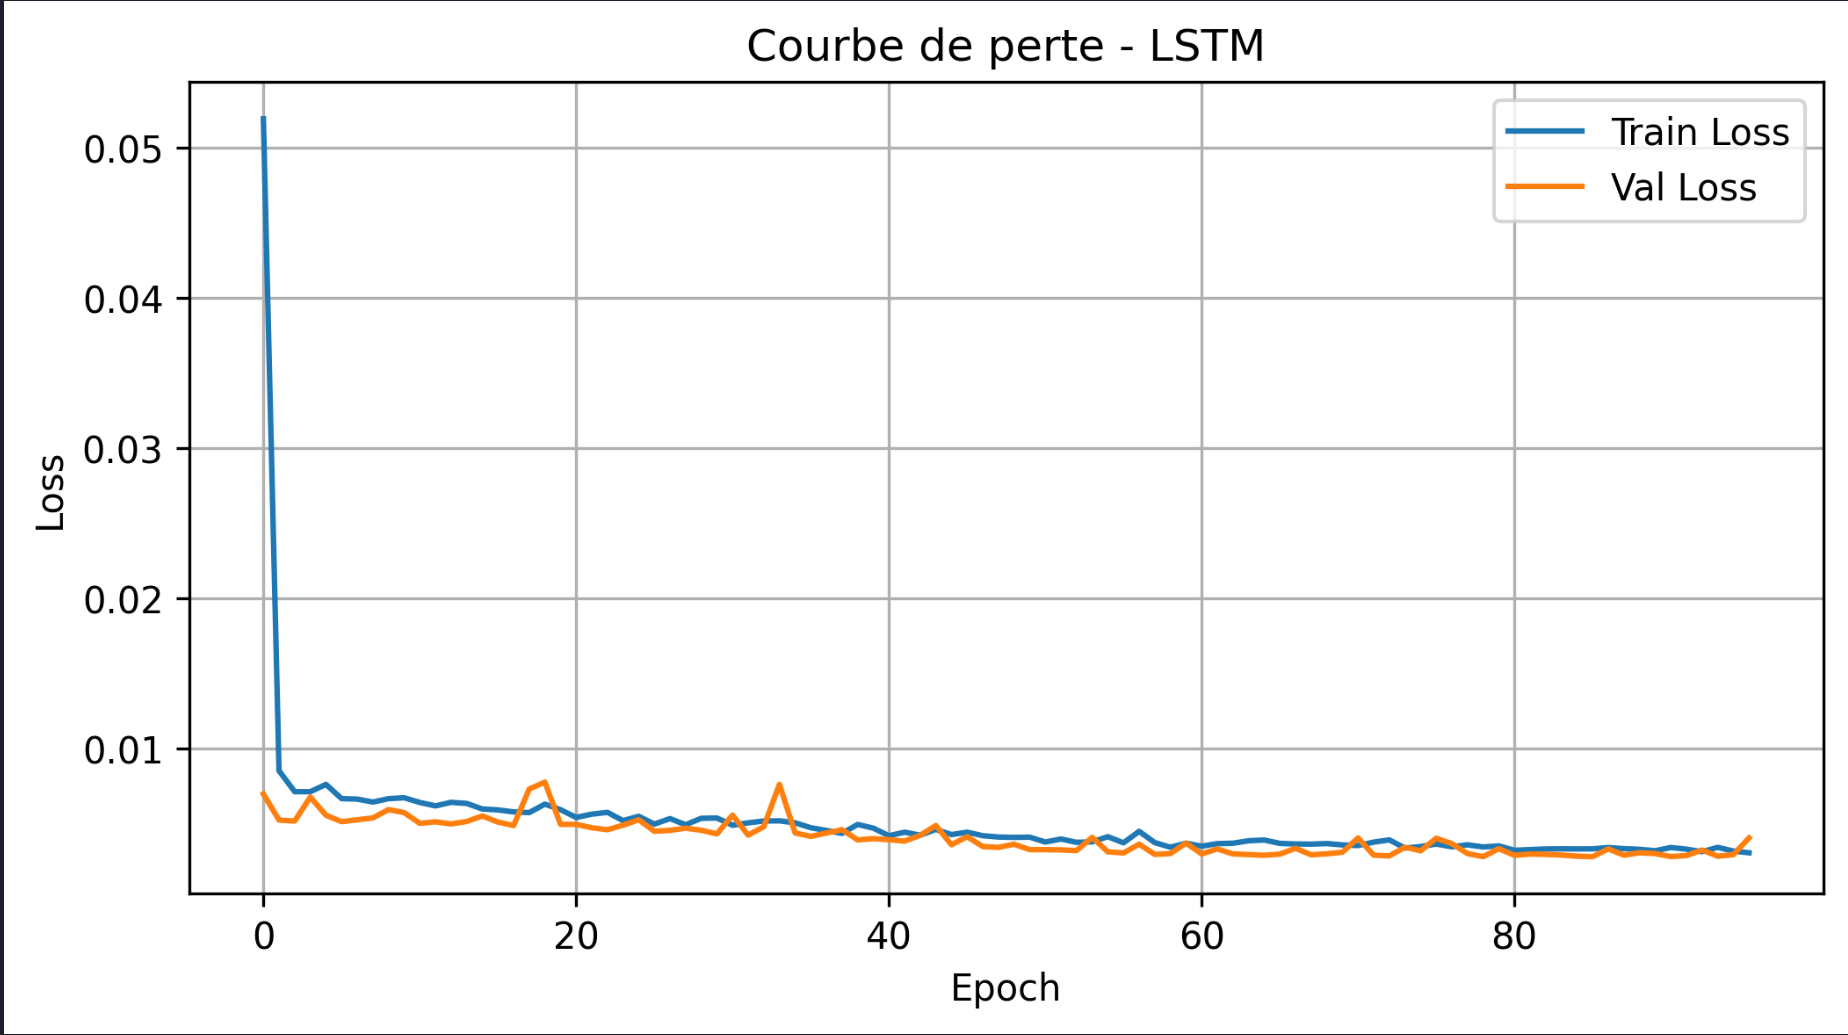

#### GRU

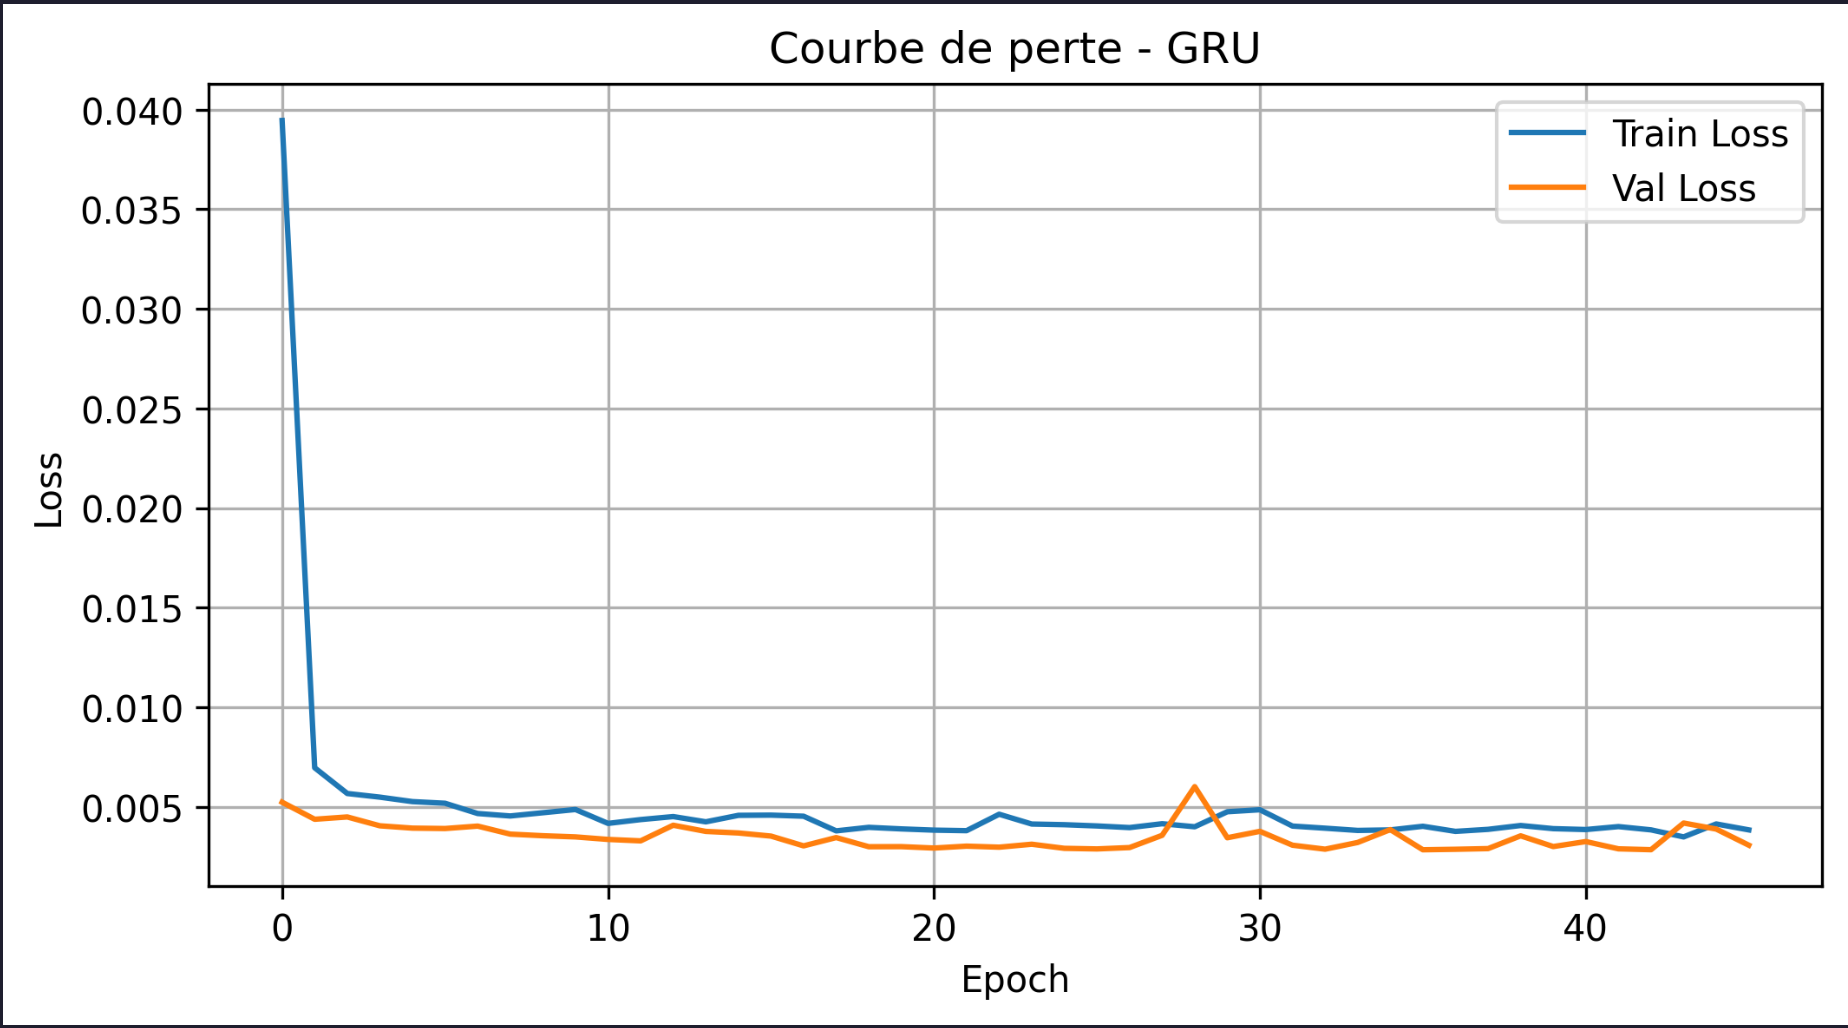

### Tableau de performances

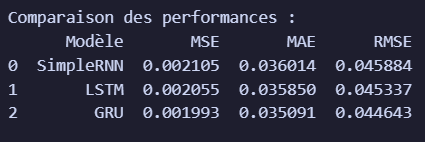